In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd

In [3]:
baseline = pd.read_table("baseline.tsv")
intvector = pd.read_table("intvector.tsv")
bench = pd.concat([baseline, intvector])

In [4]:
bench.type = map(lambda s: s.split(".")[-1], bench.type)
bench["absttype"] = map(lambda s: s.split("{")[0], bench.type)

In [5]:
figsize(12, 8)

In [6]:
def plot_bench(name, eltype):
    bench[(bench.absttype == "IntArray") & (bench.eltype == eltype)]\
        .pivot(index="w", columns="absttype", values="bench_" + name)\
        .plot(style="o-", legend=False)
    baseline = bench.ix[
        (bench.absttype == "Array") & (bench.eltype == eltype),
        "bench_" + name]
    axhline(float(baseline), linestyle="--", label="Array (baseline)")
    title("{} ({})".format(name, eltype))
    ylim(ymin=0)
    ylabel("sec / op")
    grid()
    legend(loc="upper left")
    savefig("{}_{}.png".format(name, eltype))

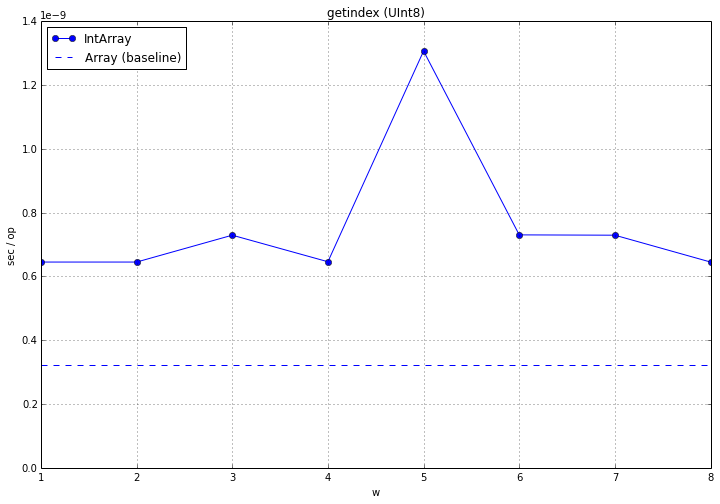

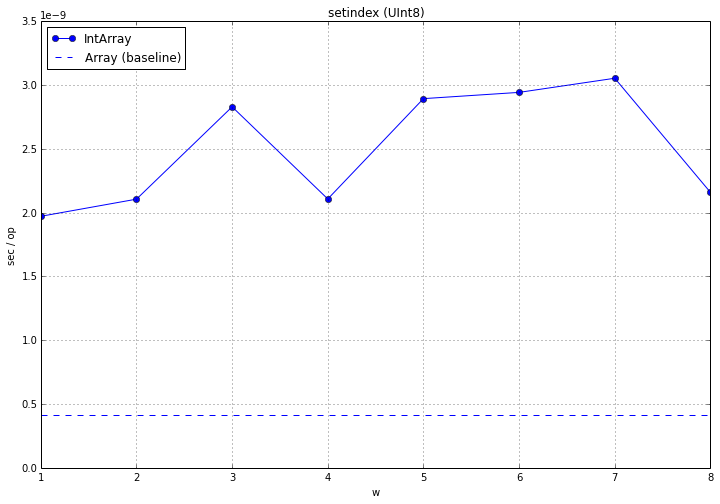

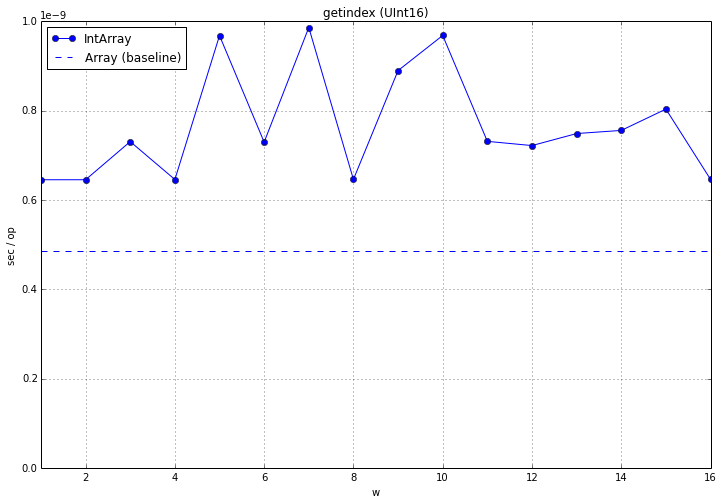

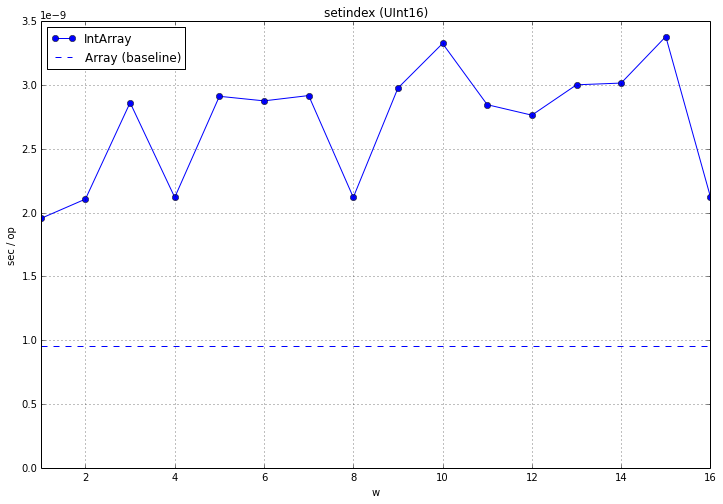

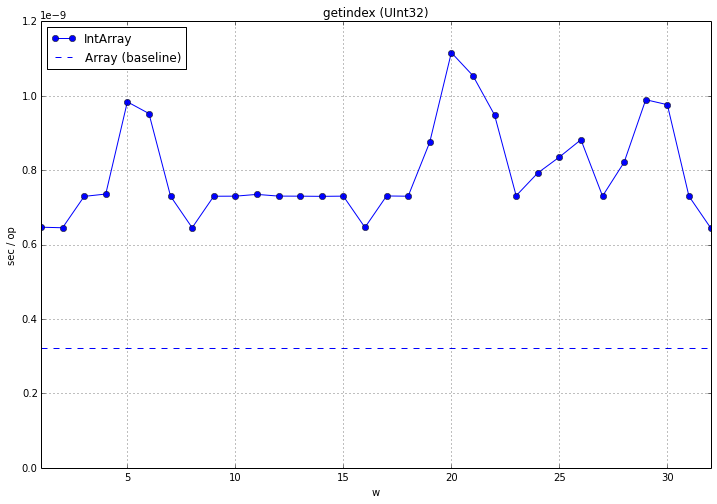

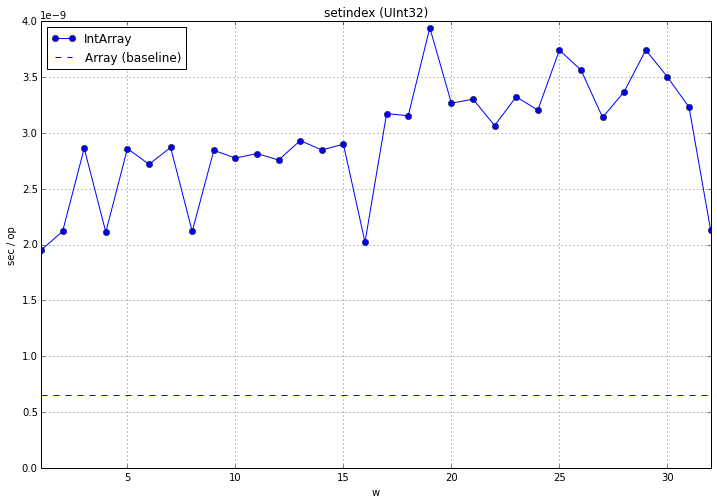

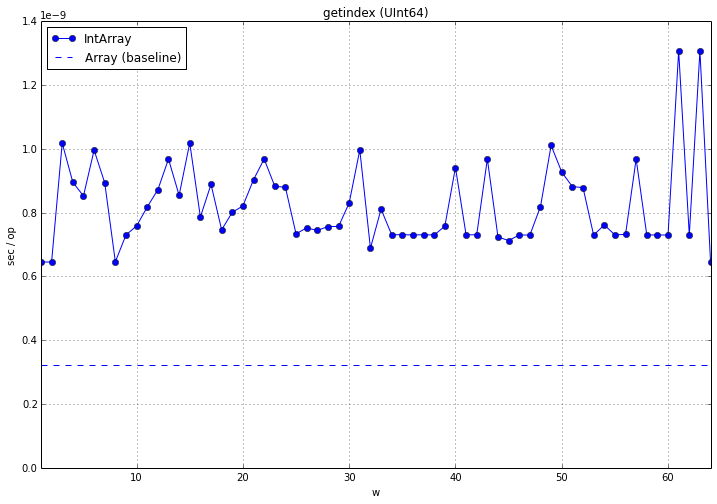

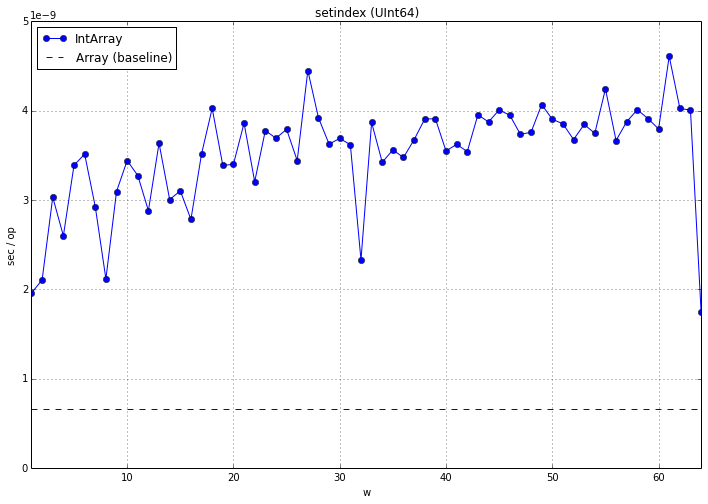

In [7]:
for eltype in ["UInt8", "UInt16", "UInt32", "UInt64"]:
    plot_bench("getindex", eltype)
    show()
    plot_bench("setindex", eltype)
    show()

In [8]:
pd.options.display.max_rows = 1000

In [9]:
bench.columns

Index([u'bench_getindex', u'bench_setindex', u'eltype', u'type', u'w',
       u'absttype'],
      dtype='object')

In [10]:
baseline

,type,eltype,bench_getindex,bench_setindex
0,"Array{UInt8,1}",UInt8,3.229796e-10,4.102990e-10
1,"Array{UInt16,1}",UInt16,4.860615e-10,9.568618e-10
2,"Array{UInt32,1}",UInt32,3.227618e-10,6.543348e-10
3,"Array{UInt64,1}",UInt64,3.227678e-10,6.555787e-10


In [11]:
intvector

,type,eltype,w,bench_getindex,bench_setindex
0,"IntArrays.IntArray{1,UInt8,1}",UInt8,1,6.452644e-10,1.971985e-09
1,"IntArrays.IntArray{2,UInt8,1}",UInt8,2,6.452702e-10,2.106302e-09
2,"IntArrays.IntArray{3,UInt8,1}",UInt8,3,7.295167e-10,2.830239e-09
3,"IntArrays.IntArray{4,UInt8,1}",UInt8,4,6.462478e-10,2.107720e-09
4,"IntArrays.IntArray{5,UInt8,1}",UInt8,5,1.307125e-09,2.894436e-09
5,"IntArrays.IntArray{6,UInt8,1}",UInt8,6,7.304901e-10,2.943472e-09
6,"IntArrays.IntArray{7,UInt8,1}",UInt8,7,7.294779e-10,3.054321e-09
7,"IntArrays.IntArray{8,UInt8,1}",UInt8,8,6.452951e-10,2.159850e-09
8,"IntArrays.IntArray{1,UInt16,1}",UInt16,1,6.452715e-10,1.954959e-09
9,"IntArrays.IntArray{2,UInt16,1}",UInt16,2,6.452960e-10,2.106846e-09
